In [53]:
# Note: predict column 't'
# file name interpretation: df_day_1_1 -> daily, 1 day to predict next 1 day

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('aapl.us.csv')

Text(0, 0.5, 'Close Price')

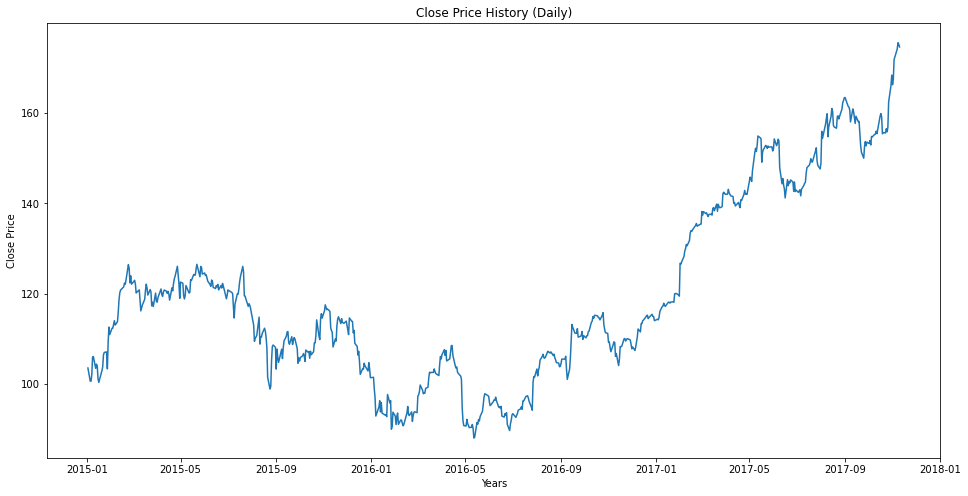

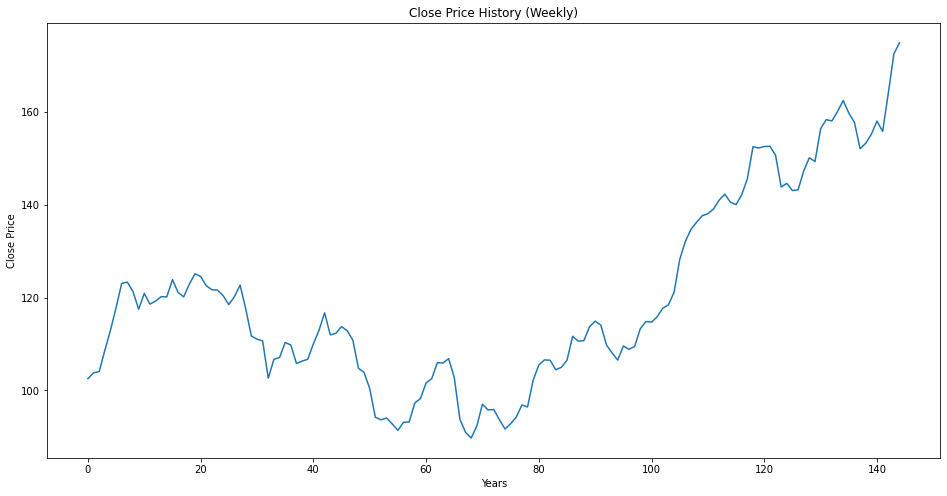

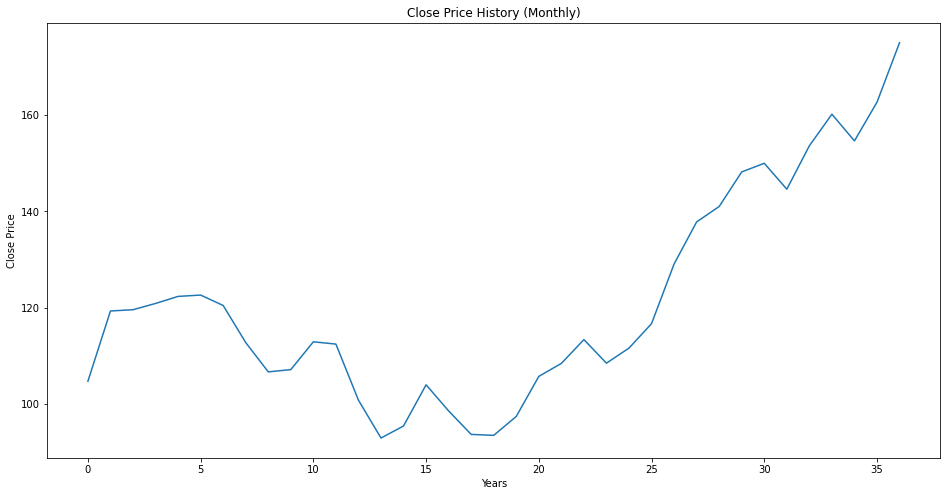

In [54]:
# discard data before year 2005
df = df[~(df['Date'] < '2015-01-01')]

# weekly: each row is an average of 5 days
df_weekly = df.groupby(np.arange(len(df))//5).mean()

# monthly: each row is an average of 20 days
df_monthly = df.groupby(np.arange(len(df))//20).mean()

#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

# plot daily
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title("Close Price History (Daily)")
plt.xlabel("Years")
plt.ylabel("Close Price")

# weekly: each row is an average of 5 days
df_weekly = df.groupby(np.arange(len(df))//5).mean()

# plot weekly
plt.figure(figsize=(16,8))
plt.plot(df_weekly['Close'])
plt.title("Close Price History (Weekly)")
plt.xlabel("Years")
plt.ylabel("Close Price")

# monthly: each row is an average of 20 days
df_monthly = df.groupby(np.arange(len(df))//20).mean()

# plot monthly
plt.figure(figsize=(16,8))
plt.plot(df_monthly['Close'])
plt.title("Close Price History (Monthly)")
plt.xlabel("Years")
plt.ylabel("Close Price")

In [55]:
# daily: 1 day to predict next 1 day, X: close price, y: close price
df_day_1_1 = pd.DataFrame()
df_day_1_1['t-1'] = df['Close']
df_day_1_1['t'] = df['Close'].shift(-1)
df_day_1_1 = df_day_1_1.dropna()
df_day_1_1['movement'] = np.where(df_day_1_1["t"] > df_day_1_1['t-1'], 1, 0)
df_day_1_1.to_csv('df_day_1_1.csv')

# daily: 5 day to predict next 1 day, X: close price, y: close price
df_day_5_1 = pd.DataFrame()
df_day_5_1['t-5'] = df['Close']
df_day_5_1['t-4'] = df['Close'].shift(-1)
df_day_5_1['t-3'] = df['Close'].shift(-2)
df_day_5_1['t-2'] = df['Close'].shift(-3)
df_day_5_1['t-1'] = df['Close'].shift(-4)
df_day_5_1['t'] = df['Close'].shift(-5)
df_day_5_1 = df_day_5_1.dropna()
df_day_5_1['movement'] = np.where(df_day_5_1["t"] > df_day_5_1['t-1'], 1, 0)
df_day_5_1.to_csv('df_day_5_1.csv')

# daily: 1 day to predict next 1 day, X: close price * volume, y: close price
df_day_1_1_v = pd.DataFrame()
df_day_1_1_v['t-1'] = df['Close'] * df['Volume']
df_day_1_1_v['t'] = df['Close'].shift(-1)
df_day_1_1_v = df_day_1_1_v.dropna()
df_day_1_1_v['movement'] = df_day_1_1['movement']
df_day_1_1_v.to_csv('df_day_1_1_v.csv')

# daily: 5 day to predict next 1 day, X: close price * volume, y: close price
df_day_5_1_v = pd.DataFrame()
df_day_5_1_v['t-5'] = df['Close']
df_day_5_1_v['t-4'] = (df['Close'] * df['Volume']).shift(-1)
df_day_5_1_v['t-3'] = (df['Close'] * df['Volume']).shift(-2)
df_day_5_1_v['t-2'] = (df['Close'] * df['Volume']).shift(-3)
df_day_5_1_v['t-1'] = (df['Close'] * df['Volume']).shift(-4)
df_day_5_1_v['t'] = df['Close'].shift(-5)
df_day_5_1_v = df_day_5_1_v.dropna()
df_day_5_1_v['movement'] = df_day_5_1['movement']
df_day_5_1_v.to_csv('df_day_5_1_v.csv')

In [56]:
# Note: avg of 5 days = 1 instances

# weekly: 1 instance to predict next 1 instance, X: close price, y: close price
df_week_1_1 = pd.DataFrame()
df_week_1_1['t-1'] = df_weekly['Close']
df_week_1_1['t'] = df_weekly['Close'].shift(-1)
df_week_1_1 = df_week_1_1.dropna()
df_week_1_1['movement'] = np.where(df_week_1_1["t"] > df_week_1_1['t-1'], 1, 0)
df_week_1_1.to_csv('df_week_1_1.csv')

# weekly: 5 instance to predict next 1 instance, X: close price, y: close price
df_week_5_1 = pd.DataFrame()
df_week_5_1['t-5'] = df_weekly['Close']
df_week_5_1['t-4'] = df_weekly['Close'].shift(-1)
df_week_5_1['t-3'] = df_weekly['Close'].shift(-2)
df_week_5_1['t-2'] = df_weekly['Close'].shift(-3)
df_week_5_1['t-1'] = df_weekly['Close'].shift(-4)
df_week_5_1['t'] = df_weekly['Close'].shift(-5)
df_week_5_1 = df_week_5_1.dropna()
df_week_5_1['movement'] = np.where(df_week_5_1["t"] > df_week_5_1['t-1'], 1, 0)
df_week_5_1.to_csv('df_week_5_1.csv')

# weekly: 1 instance to predict next 1 instance, X: close price * volume, y: close price
df_week_1_1_v = pd.DataFrame()
df_week_1_1_v['t-1'] = df_weekly['Close'] * df_weekly['Volume']
df_week_1_1_v['t'] = df_weekly['Close'].shift(-1)
df_week_1_1_v = df_week_1_1_v.dropna()
df_week_1_1_v['movement'] = df_week_1_1['movement']
df_week_1_1_v.to_csv('df_week_1_1_v.csv')

# weekly: 5 instance to predict next 1 instance, X: close price * volume, y: close price
df_week_5_1_v = pd.DataFrame()
df_week_5_1_v['t-5'] = df_weekly['Close'] * df_weekly['Volume']
df_week_5_1_v['t-4'] = (df_weekly['Close'] * df_weekly['Volume']).shift(-1)
df_week_5_1_v['t-3'] = (df_weekly['Close'] * df_weekly['Volume']).shift(-2)
df_week_5_1_v['t-2'] = (df_weekly['Close'] * df_weekly['Volume']).shift(-3)
df_week_5_1_v['t-1'] = (df_weekly['Close'] * df_weekly['Volume']).shift(-4)
df_week_5_1_v['t'] = df_weekly['Close'].shift(-5)
df_week_5_1_v = df_week_5_1_v.dropna()
df_week_5_1_v['movement'] = df_week_5_1['movement']
df_week_5_1_v.to_csv('df_week_5_1_v.csv')

In [57]:
# Note: avg of 20 days = 1 instances

# monthly: 1 instance to predict next 1 instance, X: close price, y: close price
df_month_1_1 = pd.DataFrame()
df_month_1_1['t-1'] = df_monthly['Close']
df_month_1_1['t'] = df_monthly['Close'].shift(-1)
df_month_1_1 = df_month_1_1.dropna()
df_month_1_1['movement'] = np.where(df_month_1_1["t"] > df_month_1_1['t-1'], 1, 0)
df_month_1_1.to_csv('df_month_1_1.csv')

# monthly: 5 instance to predict next 1 instance, X: close price, y: close price
df_month_5_1 = pd.DataFrame()
df_month_5_1['t-5'] = df_monthly['Close']
df_month_5_1['t-4'] = df_monthly['Close'].shift(-1)
df_month_5_1['t-3'] = df_monthly['Close'].shift(-2)
df_month_5_1['t-2'] = df_monthly['Close'].shift(-3)
df_month_5_1['t-1'] = df_monthly['Close'].shift(-4)
df_month_5_1['t'] = df_monthly['Close'].shift(-5)
df_month_5_1 = df_month_5_1.dropna()
df_month_5_1['movement'] = np.where(df_month_5_1["t"] > df_month_5_1['t-1'], 1, 0)
df_month_5_1.to_csv('df_month_5_1.csv')

# monthly: 1 instance to predict next 1 instance, X: close price * volume, y: close price
df_month_1_1_v = pd.DataFrame()
df_month_1_1_v['t-1'] = df_monthly['Close'] * df_monthly['Volume']
df_month_1_1_v['t'] = df_monthly['Close'].shift(-1)
df_month_1_1_v = df_month_1_1_v.dropna()
df_month_1_1_v['movement'] = df_month_1_1['movement']
df_month_1_1_v.to_csv('df_month_1_1_v.csv')

# monthly: 5 instance to predict next 1 instance, X: close price * volume, y: close price
df_month_5_1_v = pd.DataFrame()
df_month_5_1_v['t-5'] = df_monthly['Close'] * df_monthly['Volume']
df_month_5_1_v['t-4'] = (df_monthly['Close'] * df_monthly['Volume']).shift(-1)
df_month_5_1_v['t-3'] = (df_monthly['Close'] * df_monthly['Volume']).shift(-2)
df_month_5_1_v['t-2'] = (df_monthly['Close'] * df_monthly['Volume']).shift(-3)
df_month_5_1_v['t-1'] = (df_monthly['Close'] * df_monthly['Volume']).shift(-4)
df_month_5_1_v['t'] = df_monthly['Close'].shift(-5)
df_month_5_1_v = df_month_5_1_v.dropna()
df_month_5_1_v['movement'] = df_month_5_1['movement']
df_month_5_1_v.to_csv('df_month_5_1_v.csv')